In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import numpy as np

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

plt.rcParams['font.family'] = ['DejaVu Sans', 'SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False


In [2]:
df = pd.read_csv('/media/thuc/9901/0.FALL2025/DAT301m/image_captioning/flickr30k_translated.csv')

print(f"Number of rows: {len(df)}")
print(f"Columns: {list(df.columns)}")
print("\nSample data:")
df.head()


Number of rows: 31783
Columns: ['image_name', 'comment_0', 'comment_1', 'comment_2', 'comment_3', 'comment_4', 'vi_comment_0', 'vi_comment_1', 'vi_comment_2', 'vi_comment_3', 'vi_comment_4']

Sample data:


,image_name,comment_0,comment_1,comment_2,comment_3,comment_4,vi_comment_0,vi_comment_1,vi_comment_2,vi_comment_3,vi_comment_4
0,../input/flickr-image-dataset/flickr30k_images...,Two young guys with shaggy hair look at their...,"Two young , White males are outside near many...",Two men in green shirts are standing in a yard .,A man in a blue shirt standing in a garden .,Two friends enjoy time spent together .,Hai chàng trai trẻ tóc xoăn nhìn tay họ trong ...,2 con đực da trắng ở bên ngoài gần những bụi cây.,Hai người mặc áo sơ mi đang đứng trong sân.,Một người đàn ông mặc áo sơ mi màu xanh đứng t...,Hai người bạn vui chơi chung với nhau.
1,../input/flickr-image-dataset/flickr30k_images...,Several men in hard hats are operating a gian...,Workers look down from up above on a piece of...,Two men working on a machine wearing hard hats .,Four men on top of a tall structure .,Three men on a large rig .,Nhiều người cứng đầu đang điều khiển một hệ th...,nhìn xuống từ trên trên trên trên trên trên mộ...,Hai người đàn ông làm việc trên một cỗ máy cứn...,Bốn người đứng đầu một tòa nhà.,Ba người trên một giàn khoan lớn.
2,../input/flickr-image-dataset/flickr30k_images...,A child in a pink dress is climbing up a set ...,A little girl in a pink dress going into a wo...,A little girl climbing the stairs to her play...,A little girl climbing into a wooden playhouse,A girl going into a wooden building .,Một đứa trẻ mặc váy hồng đang bước vào một lối...,Một cô gái nhỏ mặc váy hồng đang đi vào một ng...,Một cô bé đi cầu thang đến nhà chơi.,♪ Một cô gái nhỏ bước vào một vở kịch,Một cô gái đang đi vào một tòa nhà gỗ.
3,../input/flickr-image-dataset/flickr30k_images...,Someone in a blue shirt and hat is standing o...,A man in a blue shirt is standing on a ladder...,A man on a ladder cleans the window of a tall...,man in blue shirt and jeans on ladder cleanin...,a man on a ladder cleans a window,Ai đó mặc áo sơ mi và đội mũ đang đứng trên cầ...,Có một người mặc áo sơ mi màu xanh đang đứng t...,Một người đàn ông trên thang rửa cửa sổ của mộ...,người đàn ông mặc áo xanh áo xanh và quần áo v...,♪ người đàn ông trên một cái thang ♪ ♪ trên cử...
4,../input/flickr-image-dataset/flickr30k_images...,"Two men , one in a gray shirt , one in a blac...",Two guy cooking and joking around with the ca...,Two men in a kitchen cooking food on a stove .,Two men are at the stove preparing food .,Two men are cooking a meal .,"Hai người đàn ông, một trong một áo sơ mi, một...",Hai gã đang đùa giỡn với cái máy quay.,Hai người đàn ông trong một nhà bếp nấu ăn nấu...,Hai người đang chuẩn bị thức ăn.,Hai người đàn ông đang nấu ăn.


In [3]:
def clean_vietnamese_text(text):
    if pd.isna(text):
        return []
    
    text = str(text).lower()
    
    text = re.sub(r'[^\w\s]', ' ', text)
    
    words = text.split()
    
    stop_words = {'và', 'của', 'cho', 'với', 'từ', 'đến', 'trong', 'ngoài', 'trên', 'dưới', 
                  'một', 'hai', 'ba', 'bốn', 'năm', 'sáu', 'bảy', 'tám', 'chín', 'mười',
                  'là', 'có', 'được', 'đang', 'sẽ', 'đã', 'rất', 'nhiều', 'ít', 'các',
                  'những', 'của', 'này', 'đó', 'kia', 'đây', 'như', 'nhưng', 'hoặc'}
    
    words = [word for word in words if len(word) >= 2 and word not in stop_words]
    
    return words

all_words = []
vietnamese_columns = ['vi_comment_0', 'vi_comment_1', 'vi_comment_2', 'vi_comment_3', 'vi_comment_4']

for col in vietnamese_columns:
    if col in df.columns:
        for text in df[col].dropna():
            words = clean_vietnamese_text(text)
            all_words.extend(words)

print(f"All words: {len(all_words)}")
print(f"Unique words: {len(set(all_words))}")


All words: 1756028
Unique words: 6586


In [4]:
word_freq = Counter(all_words)

top_30_words = word_freq.most_common(30)

print("Top 30 most frequent words:")
for i, (word, count) in enumerate(top_30_words, 1):
    print(f"{i:2d}. {word:15s} : {count:5d} times")

df_top30 = pd.DataFrame(top_30_words, columns=['Word', 'Frequency'])
df_top30


Top 30 most frequent words:
 1. người           : 102998 times
 2. đàn             : 45659 times
 3. ông             : 40249 times
 4. mặc             : 40154 times
 5. áo              : 31718 times
 6. màu             : 29046 times
 7. con             : 27407 times
 8. nữ              : 25281 times
 9. phụ             : 23697 times
10. cái             : 22475 times
11. chơi            : 19197 times
12. trẻ             : 17799 times
13. đi              : 17179 times
14. xanh            : 17162 times
15. cô              : 16538 times
16. ngồi            : 15859 times
17. đứng            : 15007 times
18. trắng           : 14716 times
19. khi             : 14708 times
20. xe              : 14184 times
21. đường           : 14133 times
22. đen             : 14127 times
23. chiếc           : 13666 times
24. gái             : 13057 times
25. bé              : 11912 times
26. bóng            : 11840 times
27. vào             : 11799 times
28. chó             : 11207 times
29. đỏ             

,Word,Frequency
0,người,102998
1,đàn,45659
2,ông,40249
3,mặc,40154
4,áo,31718
5,màu,29046
6,con,27407
7,nữ,25281
8,phụ,23697
9,cái,22475


findfont: Font family 'SimHei' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'SimHei' not found.
findfont: Font fam

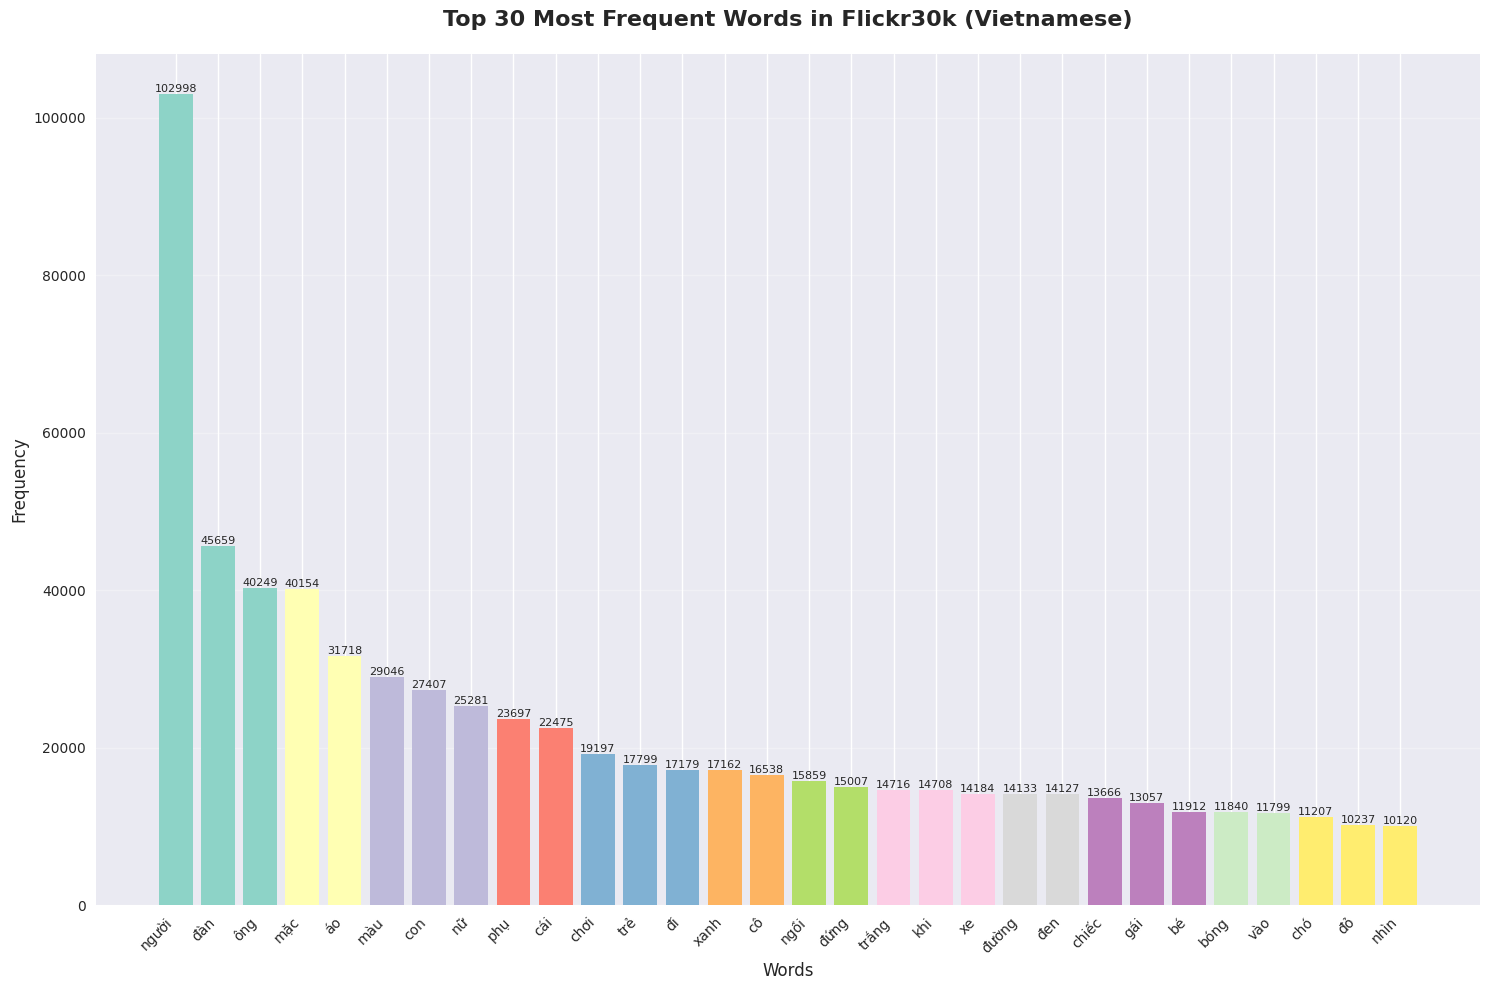

In [5]:
#Create a bar chart for the top 30 words
plt.figure(figsize=(15, 10))
bars = plt.bar(range(len(df_top30)), df_top30['Frequency'], 
               color=plt.cm.Set3(np.linspace(0, 1, len(df_top30))))

plt.title('Top 30 Most Frequent Words in Flickr30k (Vietnamese)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Set the x-axis labels
plt.xticks(range(len(df_top30)), df_top30['Word'], rotation=45, ha='right')

# Add the values on each column
for i, (bar, freq) in enumerate(zip(bars, df_top30['Frequency'])):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             str(freq), ha='center', va='bottom', fontsize=8)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


findfont: Font family 'SimHei' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'SimHei' not found.
findfont: Font fam

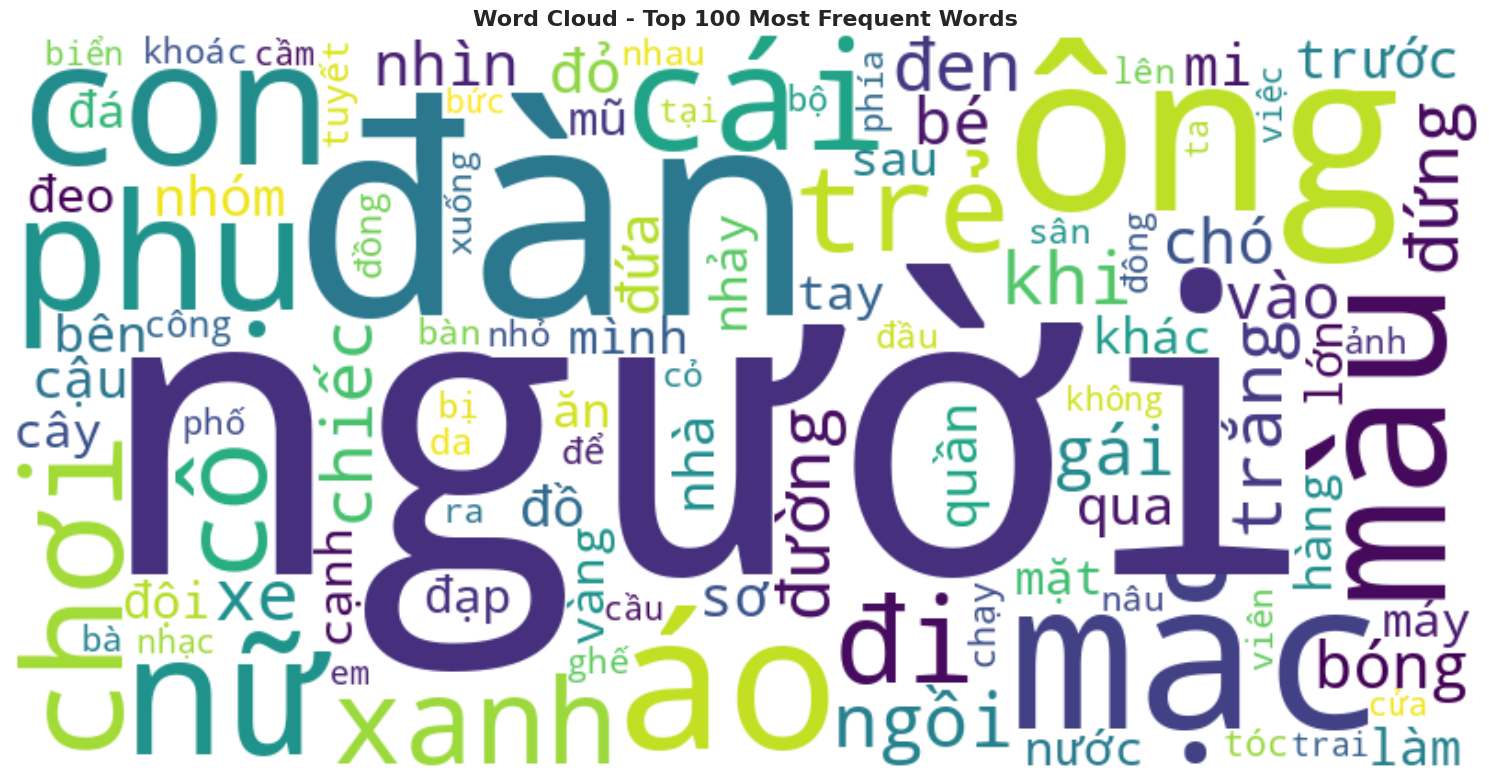

In [6]:
# Create word cloud
try:
    from wordcloud import WordCloud
    
    # Create word cloud
    plt.figure(figsize=(15, 10))
    
    # Convert Counter to dictionary
    word_freq_dict = dict(word_freq.most_common(100))  # Get top 100 words for word cloud
    
    # Create word cloud
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        max_words=100,
        colormap='viridis',
        font_path=None
    ).generate_from_frequencies(word_freq_dict)
    
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud - Top 100 Most Frequent Words', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
except ImportError:
    print("The wordcloud library is not installed. To install: pip install wordcloud")
    print("Create a pie chart instead...")
    
    # Create pie chart for top 10 words
    plt.figure(figsize=(12, 8))
    top_10 = df_top30.head(10)
    
    plt.pie(top_10['Frequency'], labels=top_10['Word'], autopct='%1.1f%%', startangle=90)
    plt.title('Distribution of Top 10 Most Frequent Words', fontsize=14, fontweight='bold')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


In [7]:
# Statisical analysis
print("=== STATISICAL ANALYSIS ===")
print(f"Total number of words in the dataset: {len(all_words):,}")
print(f"Number of unique words: {len(set(all_words)):,}")
print(f"The most frequent word: '{top_30_words[0][0]}' appears {top_30_words[0][1]:,} times")
print(f"The least frequent word in the top 30: '{top_30_words[-1][0]}' appears {top_30_words[-1][1]:,} times")

# Calculate the percentage
total_words = len(all_words)
print(f"\nTop 10 words account for {sum([count for _, count in top_30_words[:10]])/total_words*100:.2f}% of total words")
print(f"Top 30 words account for {sum([count for _, count in top_30_words])/total_words*100:.2f}% of total words")

# Save the results to a file
# df_top30.to_csv('/media/thuc/9901/0.FALL2025/DAT301m/image_captioning/top30_vietnamese_words.csv', 
#                 index=False, encoding='utf-8')
# print(f"\nThe results have been saved to: top30_vietnamese_words.csv")


=== STATISICAL ANALYSIS ===
Total number of words in the dataset: 1,756,028
Number of unique words: 6,586
The most frequent word: 'người' appears 102,998 times
The least frequent word in the top 30: 'nhìn' appears 10,120 times

Top 10 words account for 22.13% of total words
Top 30 words account for 38.33% of total words
